In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

df = pd.read_csv('https://raw.githubusercontent.com/huoran510/Session_1_code/main/Lloyds_data.csv')


In [3]:

# Calculate the number of employees in each department in the dataset
department_employee_counts = df.groupby('department')['individual_id'].nunique()
department_employee_counts_df = department_employee_counts.reset_index()
department_employee_counts_df.columns = ['Department', 'Number of Employees']
    
print(department_employee_counts_df)

            Department  Number of Employees
0           accounting                  160
1          development                   57
2                 exec                   19
3              finance                  130
4              general                   57
5      human_resources                  117
6   investor_relations                   41
7                   it                  101
8                legal                  209
9            marketing                  178
10                 ops                  174
11  product_management                   17
12          production                  203
13   quality_assurance                  131
14                risk                  122
15               sales                  153
16         secretariat                   42
17            sourcing                   91
18            strategy                   74
19          technology                  109


at_risk_event  True  False  Total  True Percentage  False Percentage
hour_mapped                                                         
0                11     37     48        22.916667         77.083333
1                42    233    275        15.272727         84.727273
2               120    558    678        17.699115         82.300885
3               102    558    660        15.454545         84.545455
4                46    302    348        13.218391         86.781609
5                 8    221    229         3.493450         96.506550
6                11    570    581         1.893287         98.106713
7                31   1428   1459         2.124743         97.875257
8                54   3195   3249         1.662050         98.337950
9               119   5882   6001         1.983003         98.016997
10              209   9479   9688         2.157308         97.842692
11              275  13077  13352         2.059617         97.940383
12              299  15329  15628 

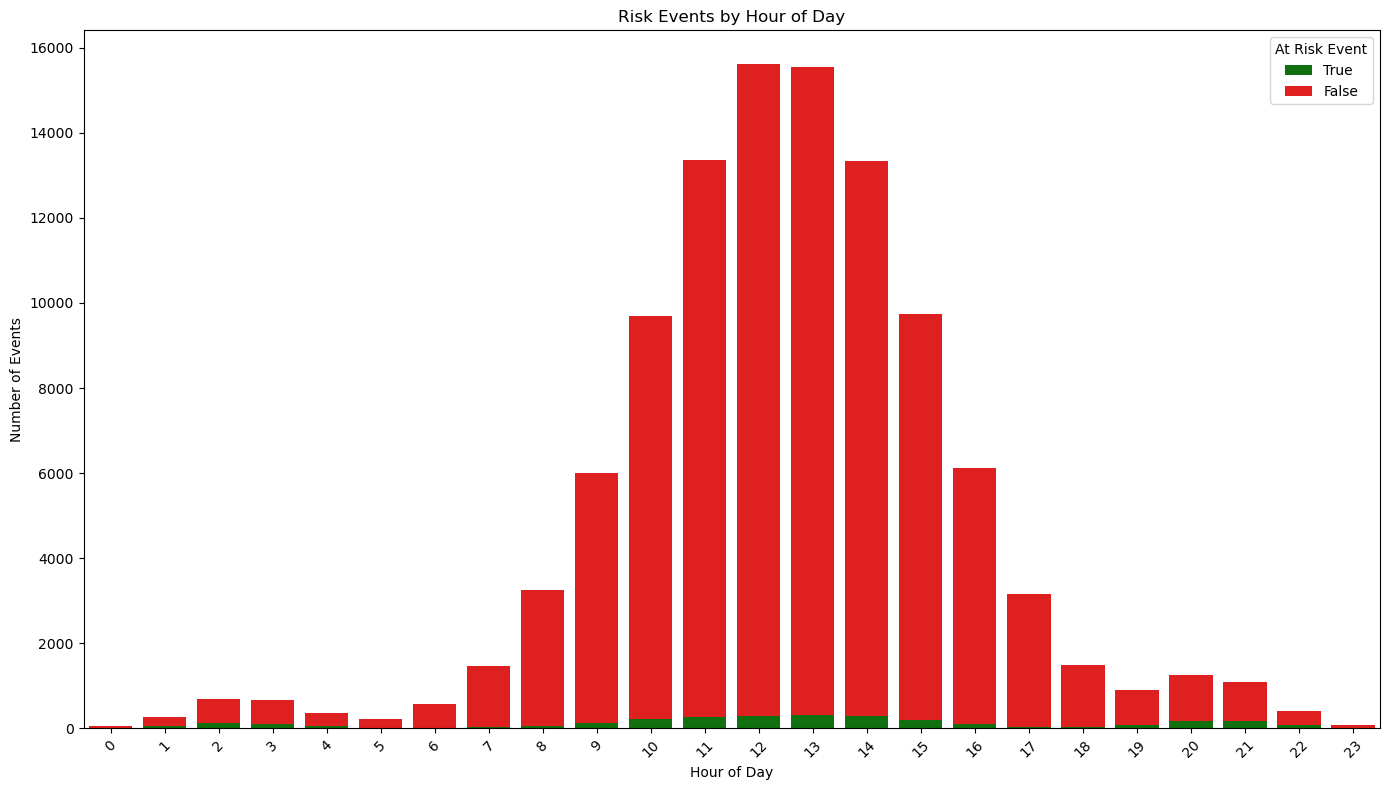

In [4]:

# Convert 'hour_of_day' to integers and store in a new column 'hour_mapped'.
df['hour_mapped'] = df['hour_of_day'].apply(lambda x: int(x))

# Group the data by 'hour_mapped' and 'at_risk_event', then count occurrences for each group.
hourly_risk_counts = df.groupby(['hour_mapped', 'at_risk_event']).size().unstack(fill_value=0)

# Calculate the total number of events for each hour and the percentage of True and False events.
hourly_risk_counts['Total'] = hourly_risk_counts[True] + hourly_risk_counts[False]
hourly_risk_counts['True Percentage'] = 100 * hourly_risk_counts[True] / hourly_risk_counts['Total']
hourly_risk_counts['False Percentage'] = 100 * hourly_risk_counts[False] / hourly_risk_counts['Total']

print(hourly_risk_counts[[True, False, 'Total', 'True Percentage', 'False Percentage']])

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=hourly_risk_counts.reset_index(), x='hour_mapped', y=True, color='green', label='True')
sns.barplot(data=hourly_risk_counts.reset_index(), x='hour_mapped', y=False, color='red', label='False', bottom=hourly_risk_counts[True])

plt.title('Risk Events by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Events')
plt.legend(title='At Risk Event')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

at_risk_event  True  False  Total  True Percentage  False Percentage
day_mapped                                                          
0               314  21264  21578         1.455186         98.544814
1               289  21223  21512         1.343436         98.656564
2               314  21223  21537         1.457956         98.542044
3               298  21041  21339         1.396504         98.603496
4               183  13906  14089         1.298886         98.701114
5               875   2229   3104        28.189433         71.810567
6               498   1620   2118        23.512748         76.487252


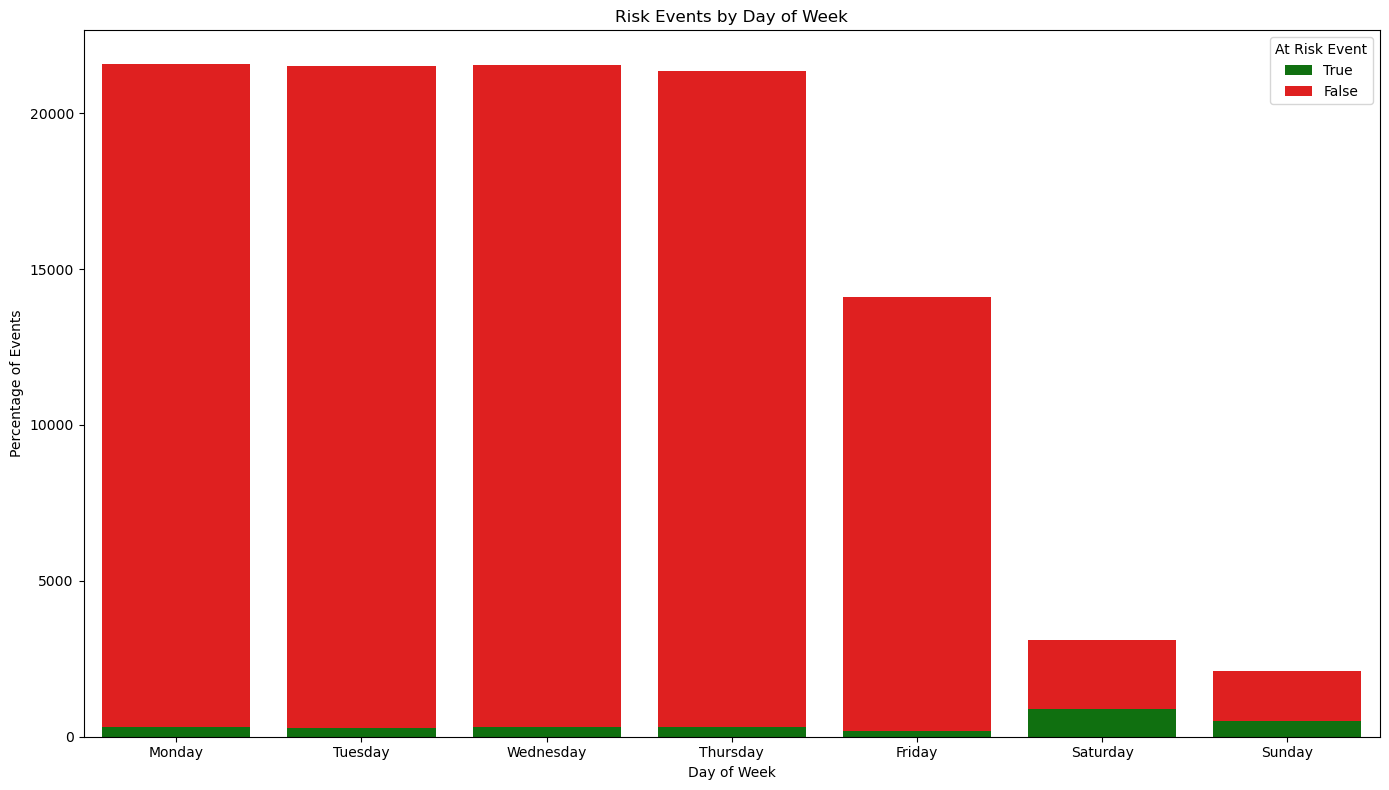

In [19]:
# Create a mapping of weekdays to integers to facilitate sorting and grouping operations.
day_mapping = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
df['day_mapped'] = df['day_of_week'].map(day_mapping)

# Group the data by 'day_mapped' and 'at_risk_event', then count occurrences for each group.
daily_risk_counts = df.groupby(['day_mapped', 'at_risk_event']).size().unstack(fill_value=0)

# Calculate the total number of events for each day and the percentages of True and False events.
daily_risk_counts['Total'] = daily_risk_counts[True] + daily_risk_counts[False]
daily_risk_counts['True Percentage'] = 100 * daily_risk_counts[True] / daily_risk_counts['Total']
daily_risk_counts['False Percentage'] = 100 * daily_risk_counts[False] / daily_risk_counts['Total']

print(daily_risk_counts[[True, False, 'Total', 'True Percentage', 'False Percentage']])

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=daily_risk_counts.reset_index(), x='day_mapped', y=True, color='green', label='True')
sns.barplot(data=daily_risk_counts.reset_index(), x='day_mapped', y=False, color='red', label='False', bottom=daily_risk_counts[True])

plt.title('Risk Events by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Percentage of Events')
plt.legend(title='At Risk Event')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.tight_layout()
plt.show()


at_risk_event       True  False  Total  True Percentage  False Percentage
department                                                               
accounting           167   6546   6713         2.487710         97.512290
development           63   2502   2565         2.456140         97.543860
exec                  38   1147   1185         3.206751         96.793249
finance              155   5982   6137         2.525664         97.474336
general               48   2062   2110         2.274882         97.725118
human_resources      136   5654   5790         2.348877         97.651123
investor_relations    77   1650   1727         4.458599         95.541401
it                   107   4776   4883         2.191276         97.808724
legal                208   9800  10008         2.078337         97.921663
marketing            334   8563   8897         3.754074         96.245926
ops                  164   7463   7627         2.150256         97.849744
product_management    17   1064   1081

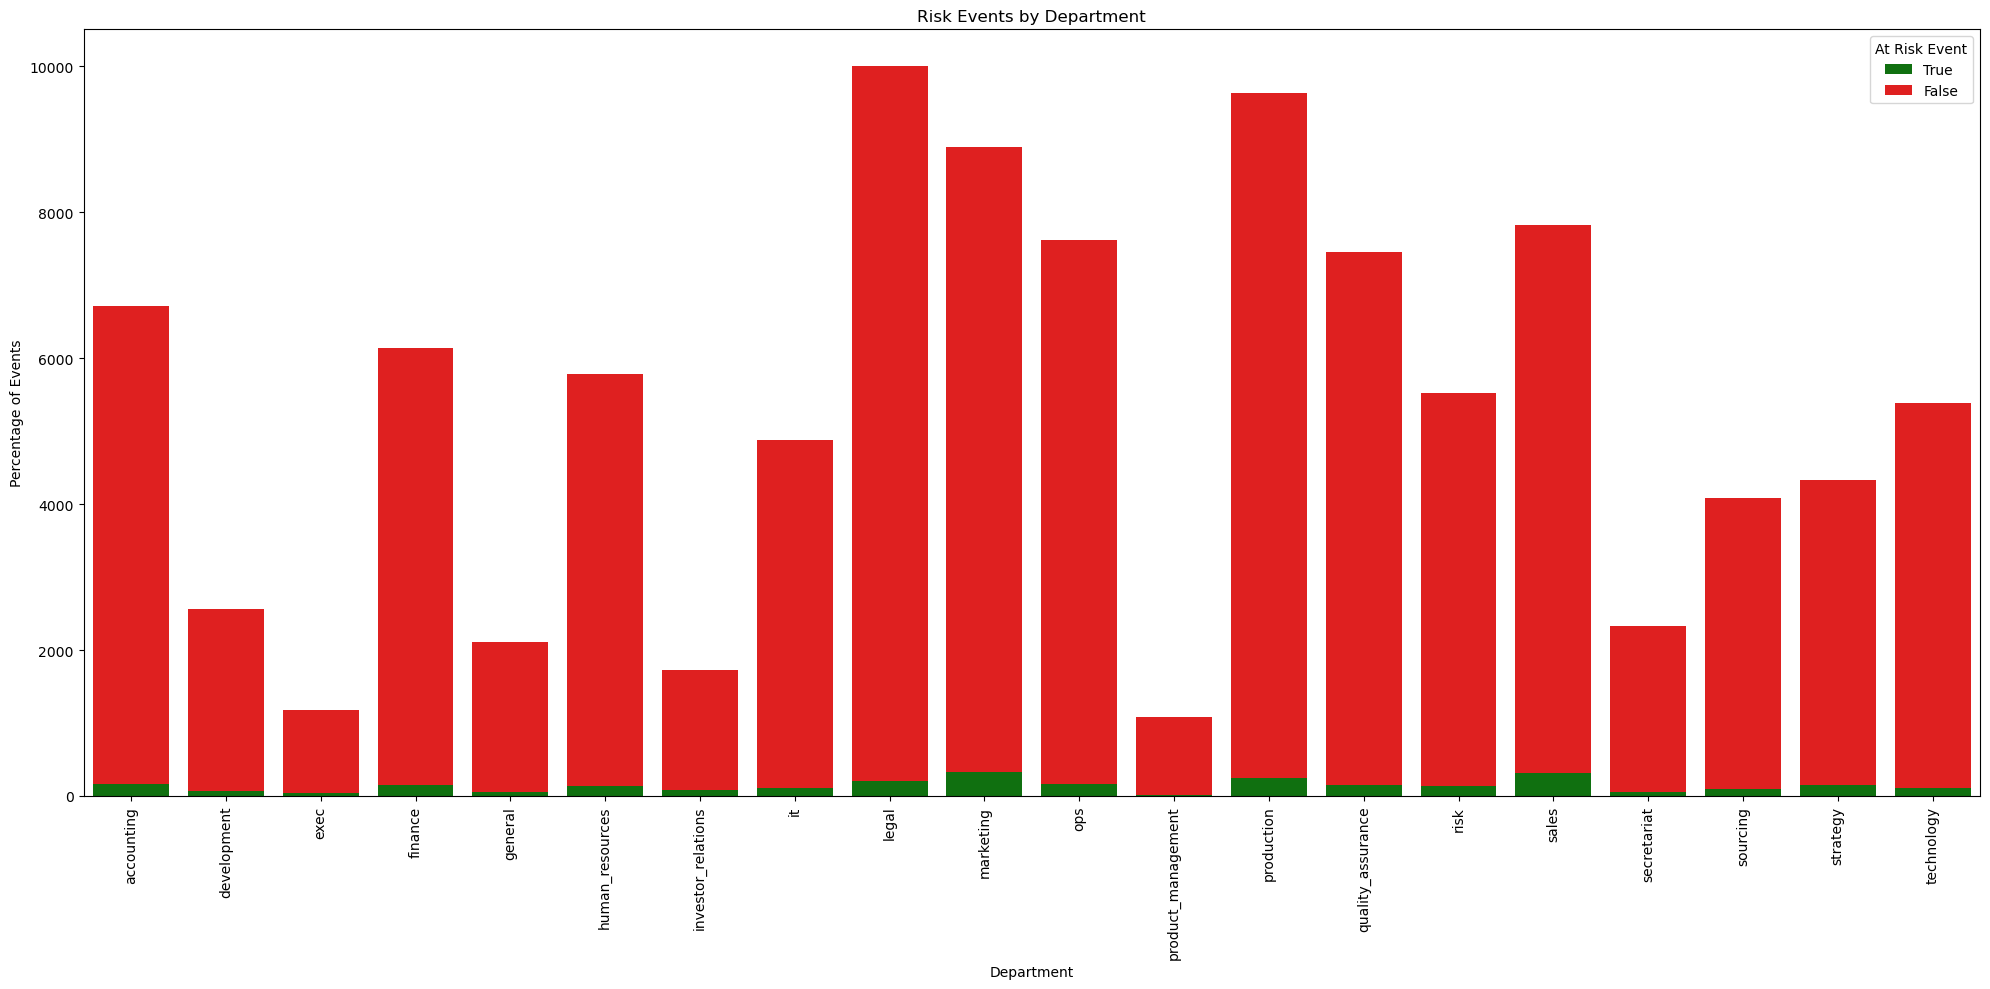

In [5]:

# Group the DataFrame by 'department' and 'at_risk_event' to count the occurrences of True and False risk events within each department.
department_risk_counts = df.groupby(['department', 'at_risk_event']).size().unstack(fill_value=0)

# Calculate the total number of events in each department and the percentage of True and False events relative to the total.
department_risk_counts['Total'] = department_risk_counts[True] + department_risk_counts[False]
department_risk_counts['True Percentage'] = 100 * department_risk_counts[True] / department_risk_counts['Total']
department_risk_counts['False Percentage'] = 100 * department_risk_counts[False] / department_risk_counts['Total']

print(department_risk_counts[[True, False, 'Total', 'True Percentage', 'False Percentage']])

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=department_risk_counts.reset_index(), x='department', y=True, color='green', label='True')
sns.barplot(data=department_risk_counts.reset_index(), x='department', y=False, color='red', label='False', bottom=department_risk_counts[True])

plt.title('Risk Events by Department')
plt.xlabel('Department')
plt.ylabel('Percentage of Events')
plt.legend(title='At Risk Event')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


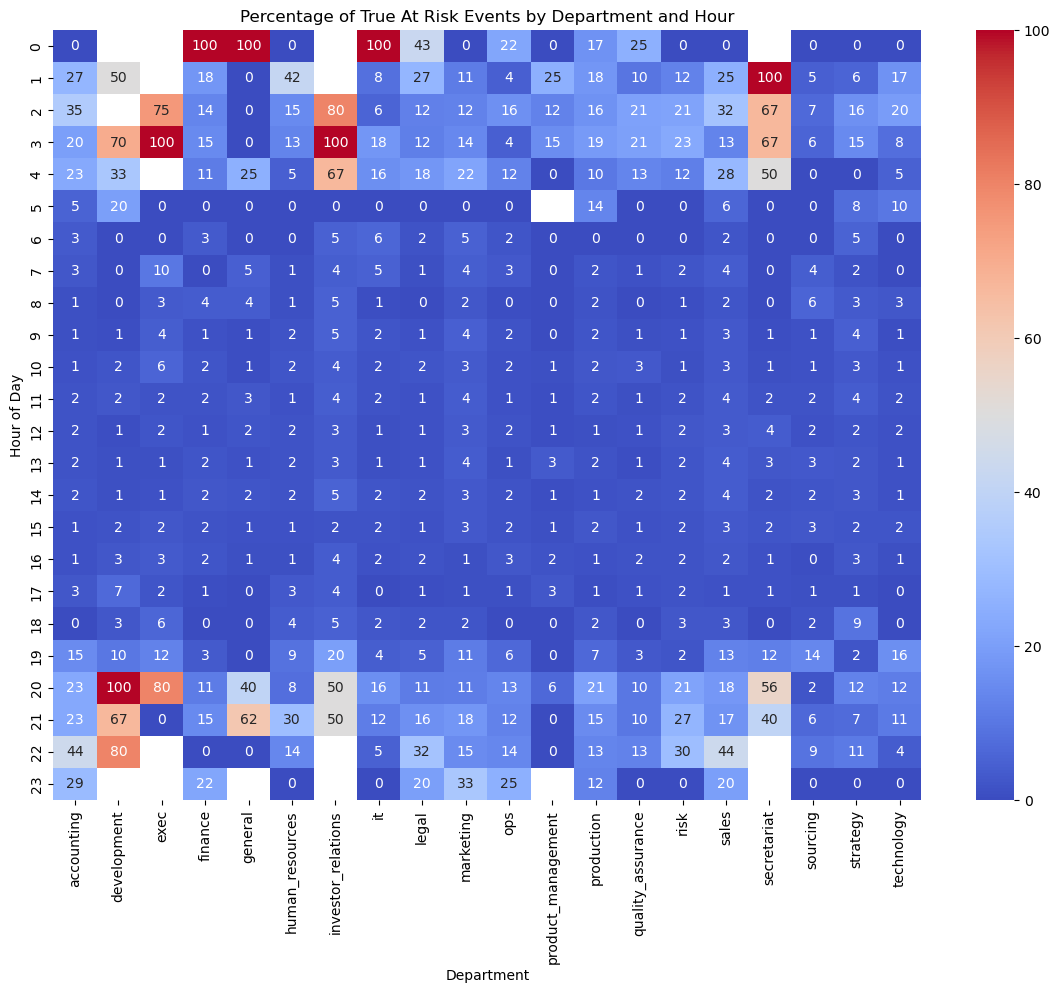

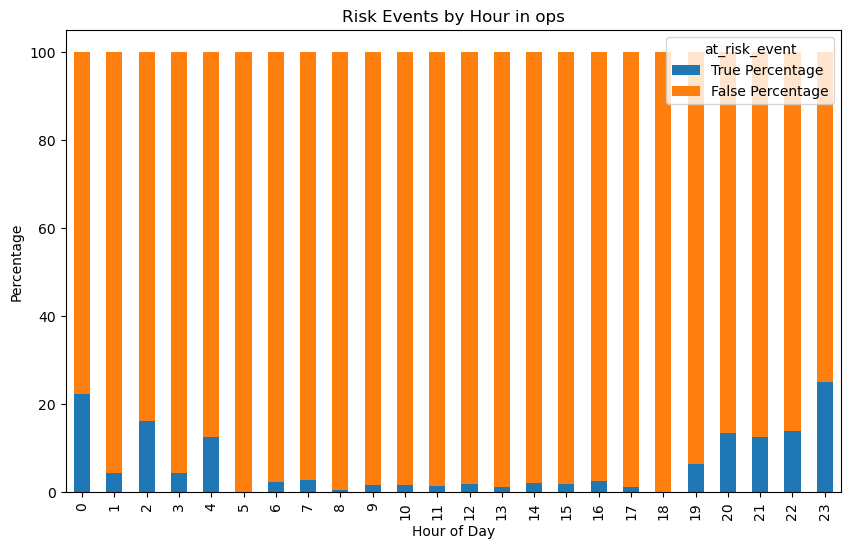

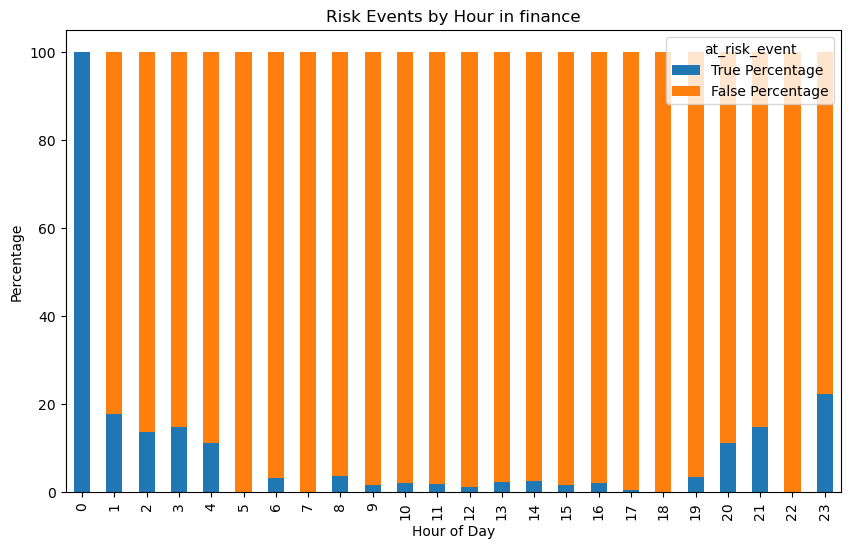

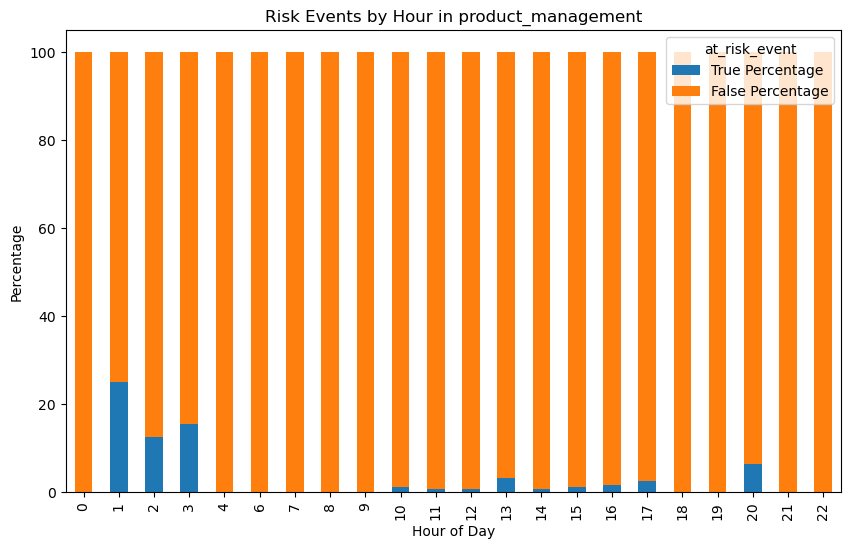

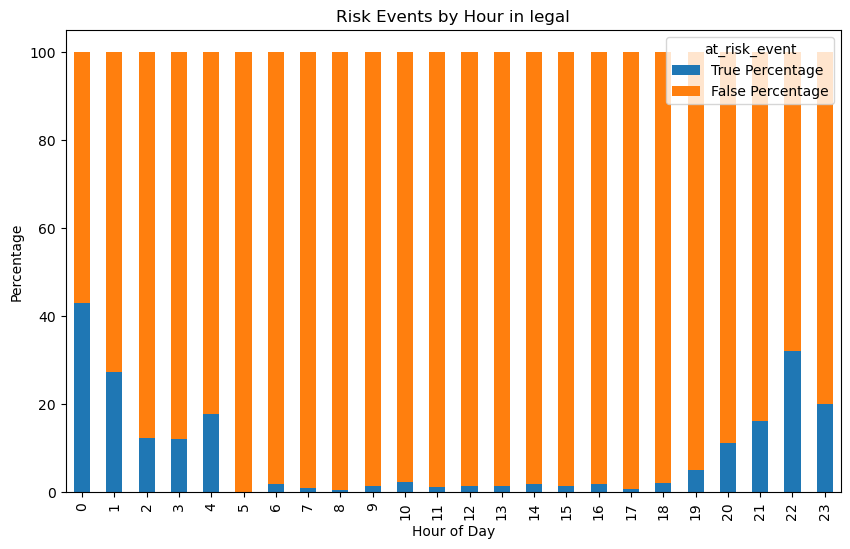

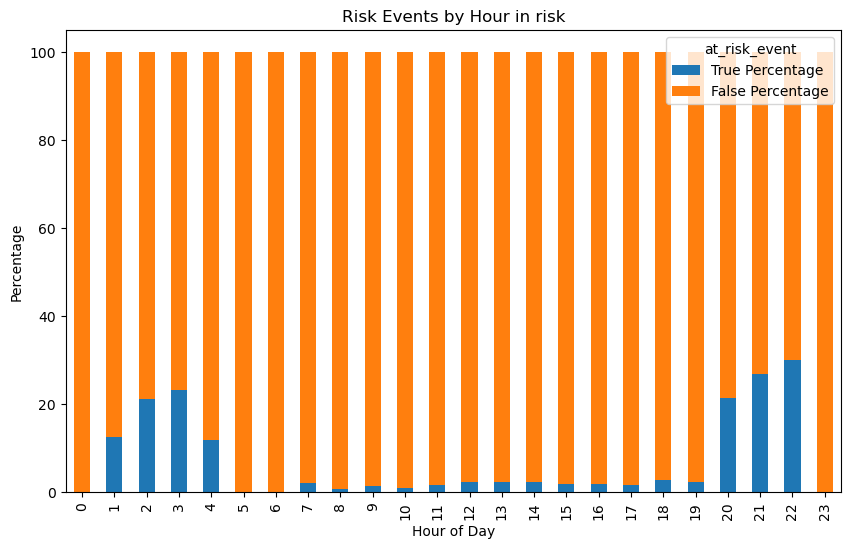

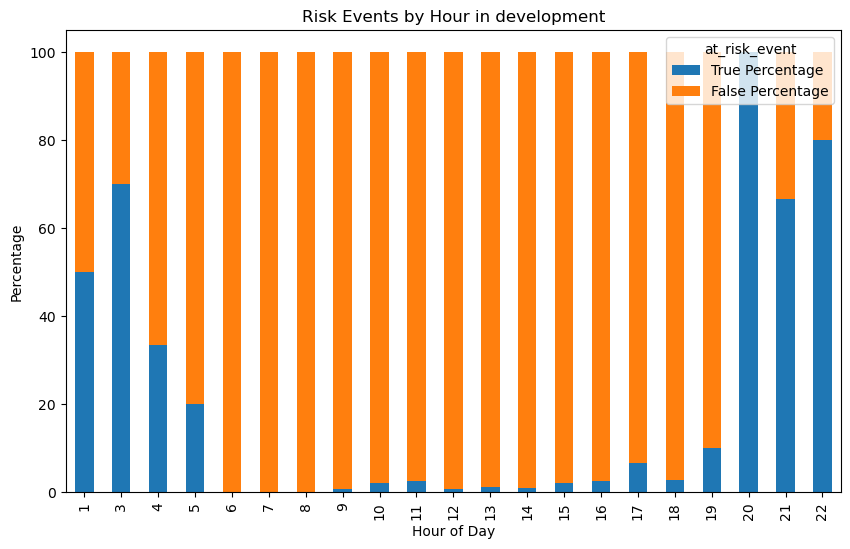

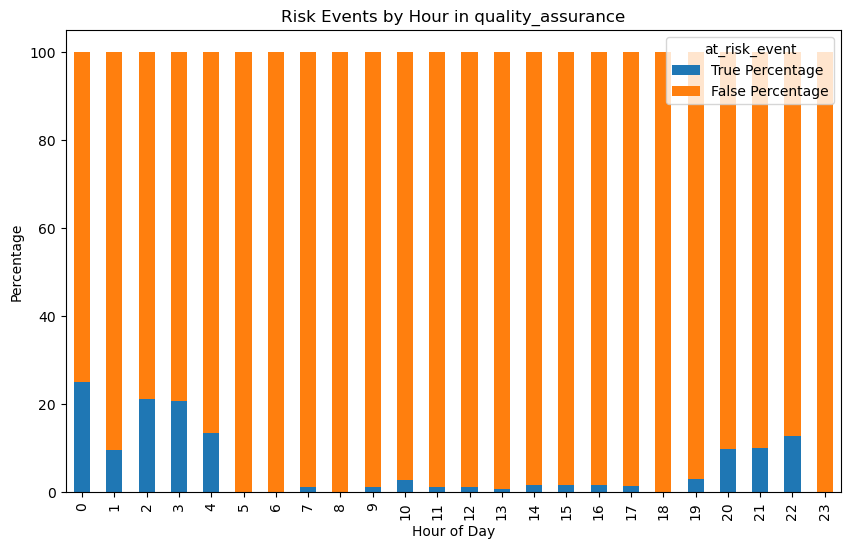

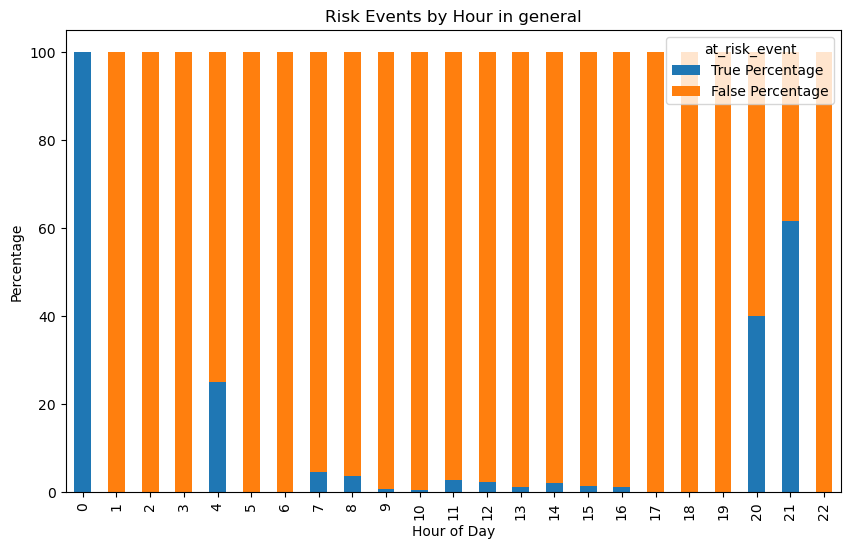

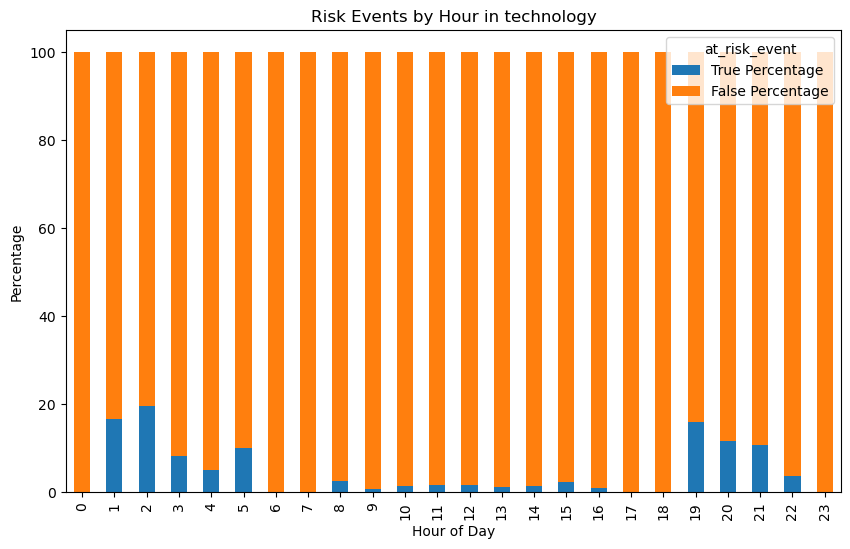

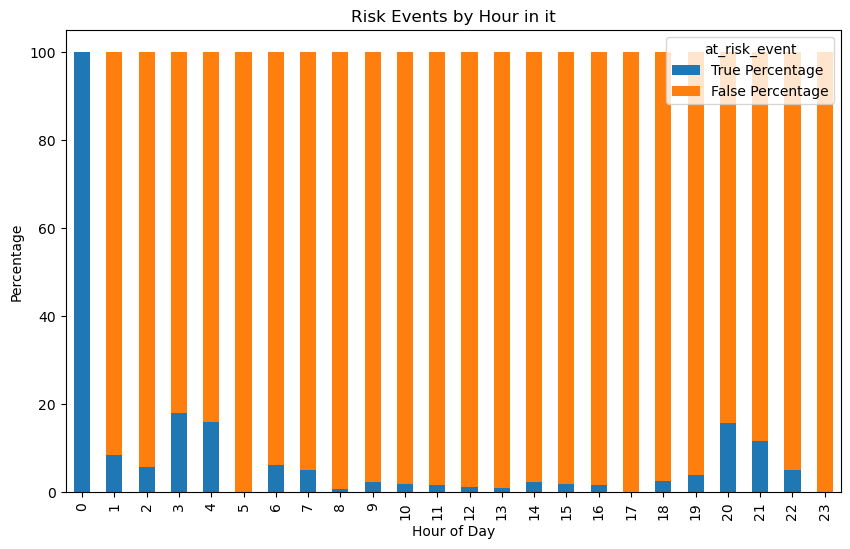

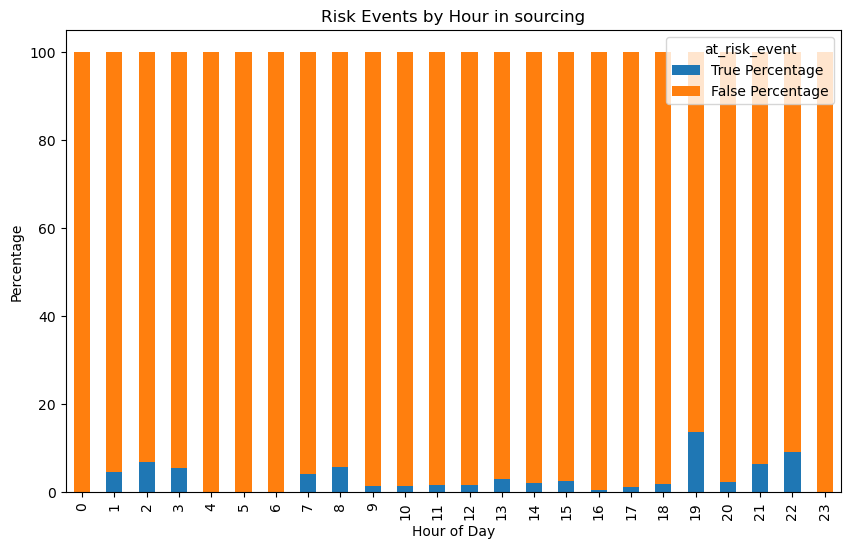

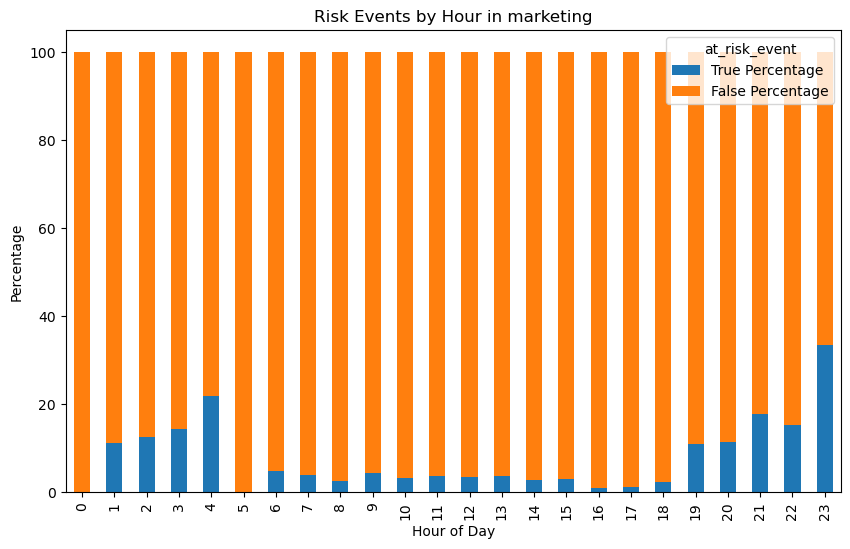

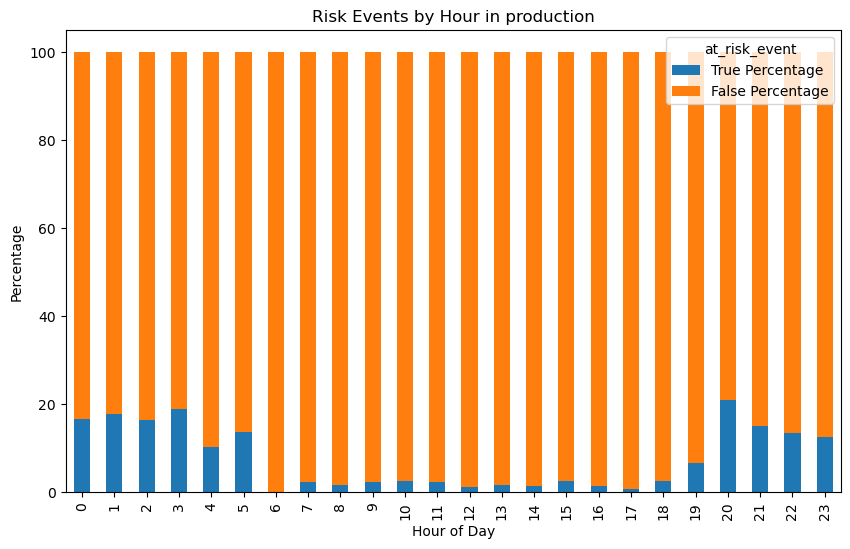

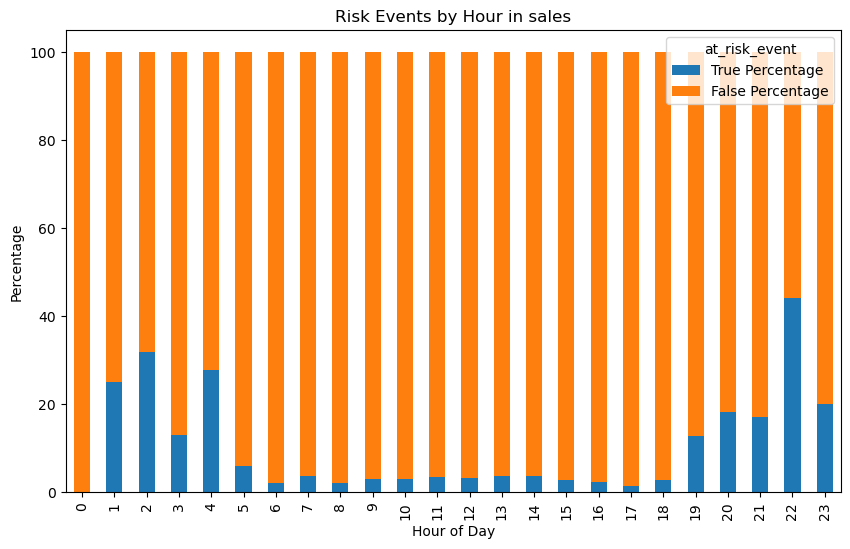

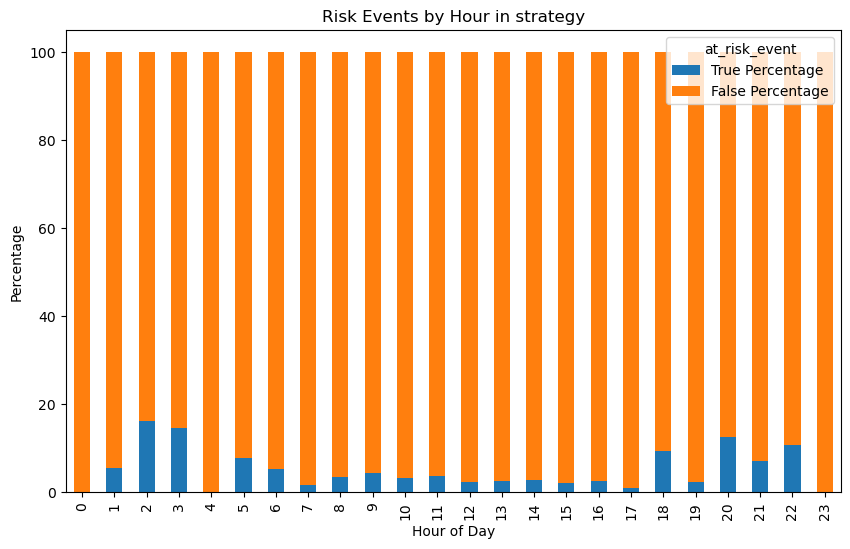

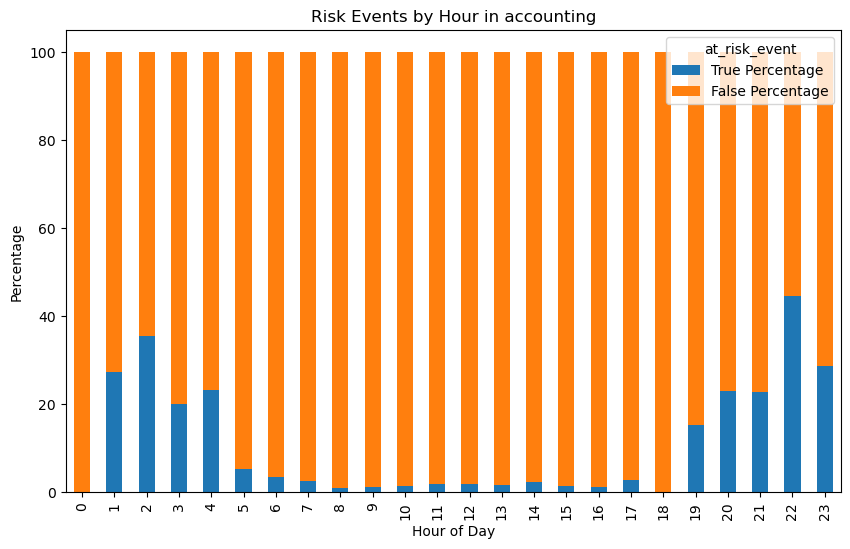

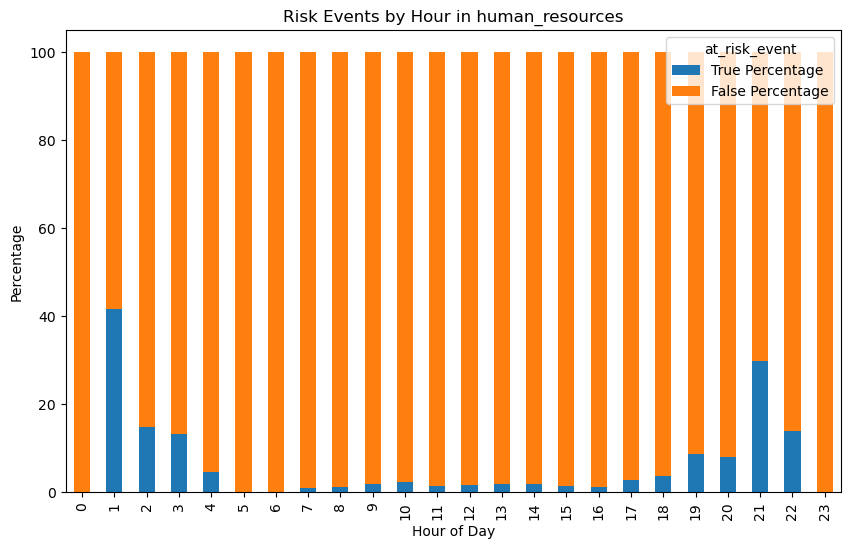

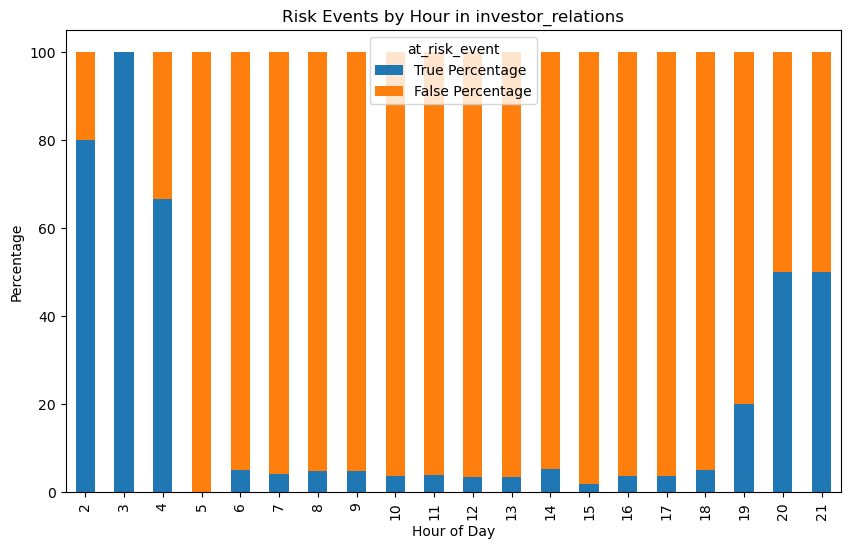

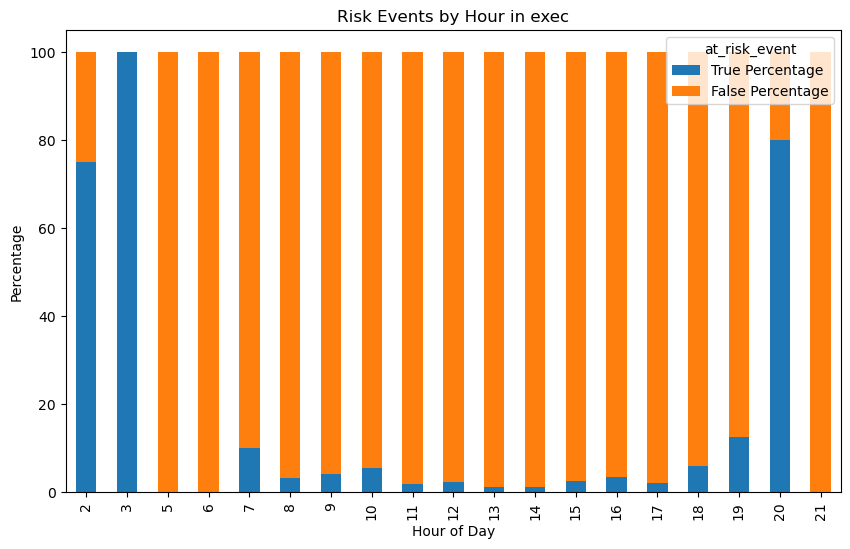

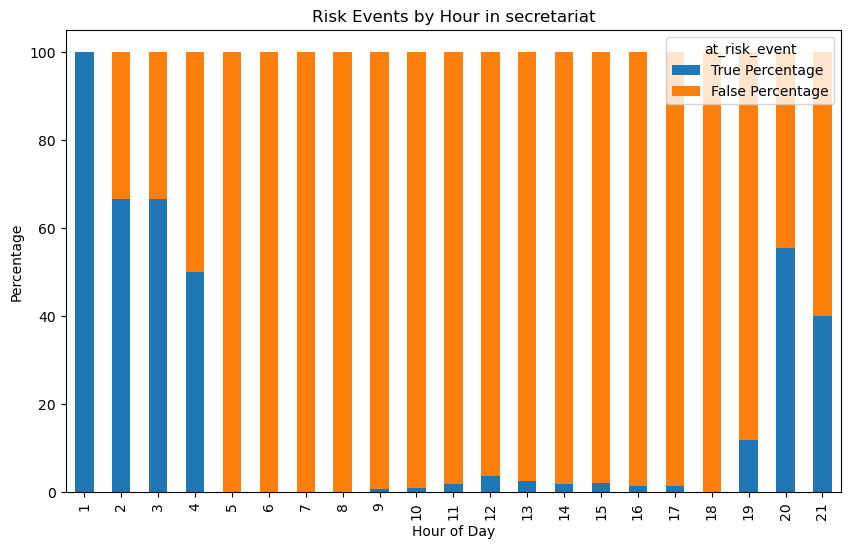

In [6]:

# Create a pivot table from the DataFrame.
pivot_df = df.pivot_table(index=['department', 'hour_mapped'], columns='at_risk_event', aggfunc='size', fill_value=0)

# Calculate the total number of events per department and hour, and the percentage of True and False risk events.
pivot_df['Total'] = pivot_df.sum(axis=1)
pivot_df['True Percentage'] = 100 * pivot_df[True] / pivot_df['Total']
pivot_df['False Percentage'] = 100 * pivot_df[False] / pivot_df['Total']

# Generate a heatmap.
plt.figure(figsize=(14, 10))
heatmap_data = pivot_df['True Percentage'].unstack(level=0)
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Percentage of True At Risk Events by Department and Hour')
plt.xlabel('Department')
plt.ylabel('Hour of Day')
plt.show()

# For a clearer view per department, plot individual stacked bar charts for True and False percentages by hour.
for department in df['department'].unique():
    sub_df = pivot_df.xs(department, level='department')
    ax = sub_df[['True Percentage', 'False Percentage']].plot(kind='bar', stacked=True, figsize=(10, 6))
    ax.set_title(f'Risk Events by Hour in {department}')
    ax.set_xlabel('Hour of Day')
    ax.set_ylabel('Percentage')
    plt.show()


In [7]:

# Calculate the median and standard deviation of spending grouped by department.
department_stats = df.groupby('department')['spend'].agg(['median', 'std']).reset_index()
department_stats.rename(columns={'median': 'Median Spend', 'std': 'Spend Std Dev'}, inplace=True)

# Calculate the median and standard deviation of spending for each individual.
individual_stats = df.groupby('individual_id')['spend'].agg(['median', 'std']).reset_index()
individual_stats.rename(columns={'median': 'Median Spend', 'std': 'Spend Std Dev'}, inplace=True)

# Group spending data by 'hour_mapped' to calculate median and standard deviation per hour.
hour_stats = df.groupby('hour_mapped')['spend'].agg(['median', 'std']).reset_index()
hour_stats.rename(columns={'median': 'Median Spend', 'std': 'Spend Std Dev'}, inplace=True)

print("Spend Statistics by Department:")
print(department_stats)
print("\nSpend Statistics by Individual:")
print(individual_stats)
print("\nSpend Statistics by Hour:")
print(hour_stats)


Spend Statistics by Department:
            department  Median Spend  Spend Std Dev
0           accounting         4.930      16.775324
1          development         4.350       8.626367
2                 exec         4.710       8.426916
3              finance         5.110      18.393438
4              general         4.830       8.574802
5      human_resources         5.080      17.118242
6   investor_relations         5.230      20.681596
7                   it         4.990      19.898530
8                legal         4.930      17.884833
9            marketing         5.150      19.986498
10                 ops         5.260      22.835263
11  product_management         5.960      23.685775
12          production         4.690      14.461358
13   quality_assurance         5.320      20.731826
14                risk         4.980      18.349045
15               sales         5.515      22.595094
16         secretariat         4.610      10.289804
17            sourcing         5

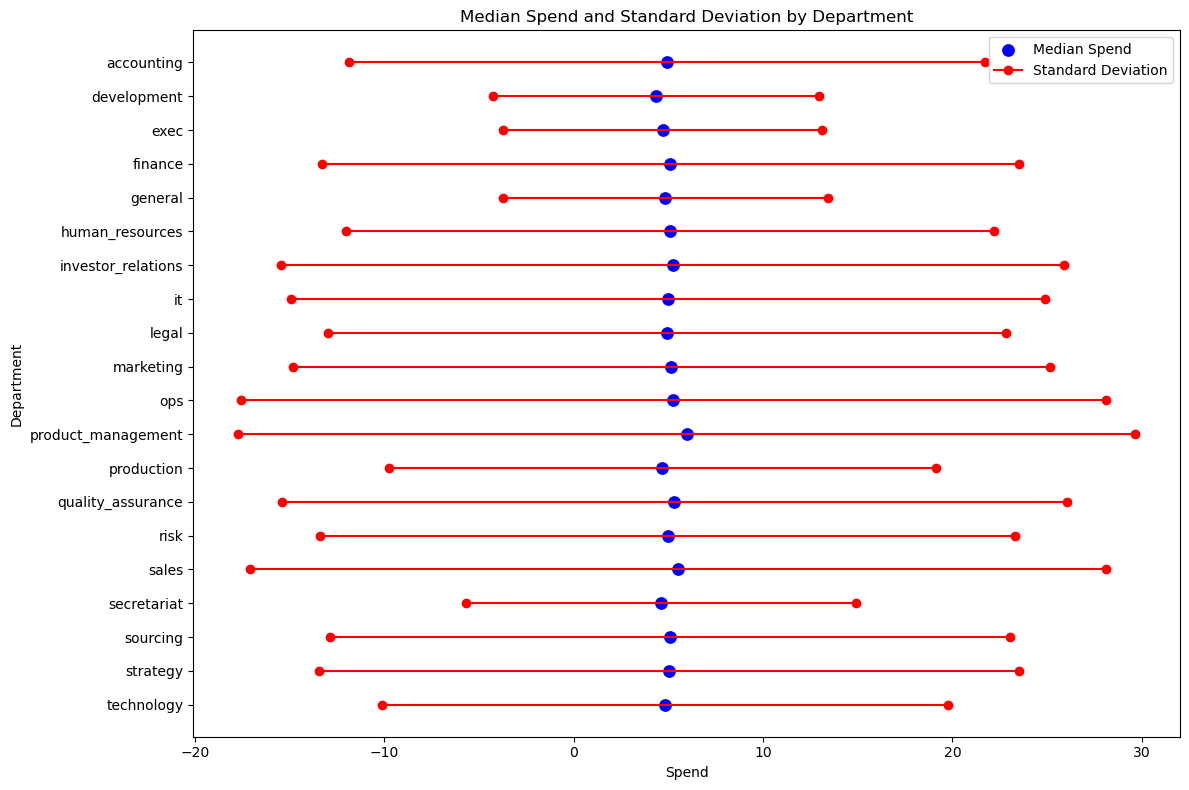

In [8]:

# Group the DataFrame by 'department' and calculate the median and standard deviation of the 'spend' column.
statistics_df = df.groupby('department')['spend'].agg(median='median', std_dev='std').reset_index()

# Create a figure and axis for plotting, with specified dimensions for clarity.
plt.figure(figsize=(12, 8))
ax = plt.gca()

# Create a figure and axis for plotting, with specified dimensions for clarity.
sns.scatterplot(x='median', y='department', data=statistics_df, s=100, color='blue', label='Median Spend', ax=ax)

# Iterate over the rows of the DataFrame to plot the standard deviation range for each department.
for index, row in statistics_df.iterrows():
    ax.plot([row['median'] - row['std_dev'], row['median'] + row['std_dev']], [row['department'], row['department']], color='red', marker='o', label='Standard Deviation' if index == 0 else "")

plt.title('Median Spend and Standard Deviation by Department')
plt.xlabel('Spend')
plt.ylabel('Department')
plt.legend()

plt.tight_layout()
plt.show()


Point Biserial Correlation: 0.1329173557052098, P-value: 0.0


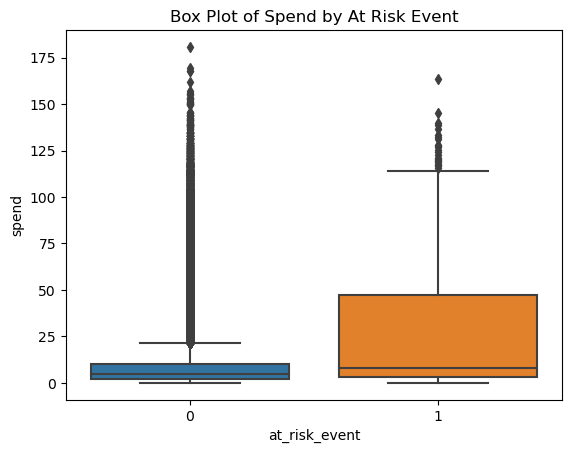

In [9]:

# Convert the boolean 'at_risk_event' values into integers for statistical analysis.
df['at_risk_event'] = df['at_risk_event'].astype(int)

# Calculate the point biserial correlation coefficient between 'at_risk_event' and 'spend'.
correlation, p_value = pointbiserialr(df['at_risk_event'], df['spend'])
print(f"Point Biserial Correlation: {correlation}, P-value: {p_value}")

# Create a box plot.
sns.boxplot(x='at_risk_event', y='spend', data=df)
plt.title('Box Plot of Spend by At Risk Event')
plt.show()
